# TITANIC DATA ANALYSIS

## In this assignment we perform EDA and implement various testing models to analyse the dataset

#### Performing EDA4

In [34]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [36]:
df.shape

(891, 12)

#### Handle Missing Values

In [37]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

#### Encode Categorical Variables

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

#### Drop Irrelevant Columns

In [39]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#### Data visualization

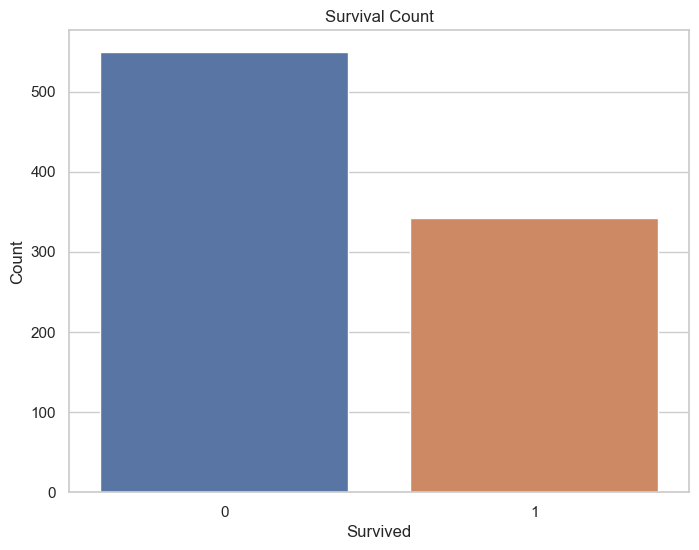

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot 1: Survival Count
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#### Fewer passengers survived than those who did not

AttributeError: 'numpy.int64' object has no attribute 'startswith'

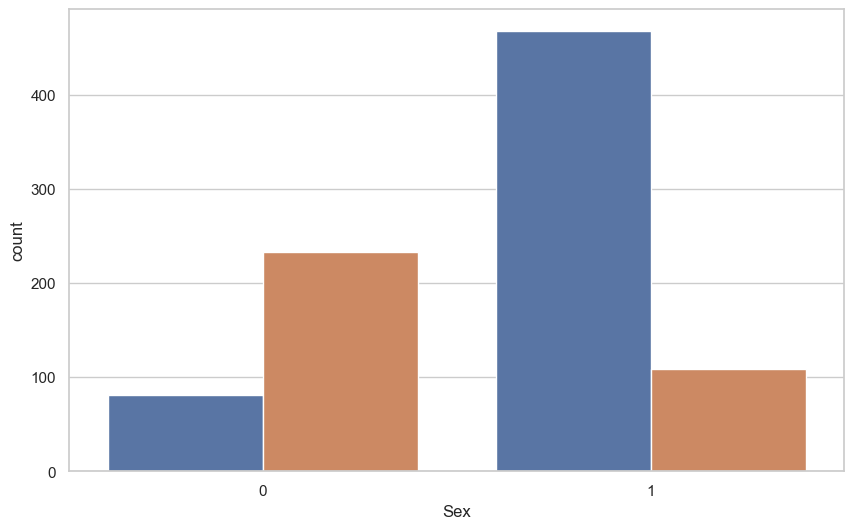

In [41]:
# Plot 2: Survival by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

#### Females had a higher survival rate compared to males

AttributeError: 'numpy.int64' object has no attribute 'startswith'

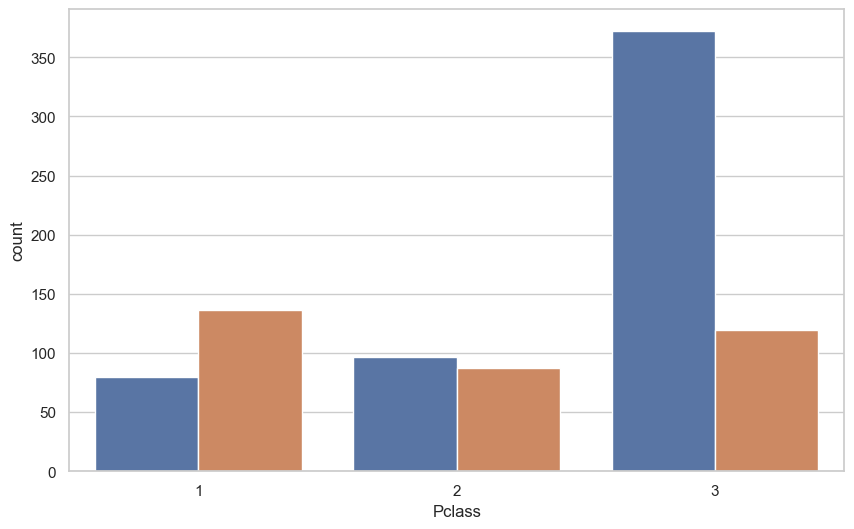

In [42]:
# Plot 3: Survival by Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

#### Passengers in 1st class had a significantly higher survival rate than those in 2nd and 3rd class

C:\Users\nafis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nafis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


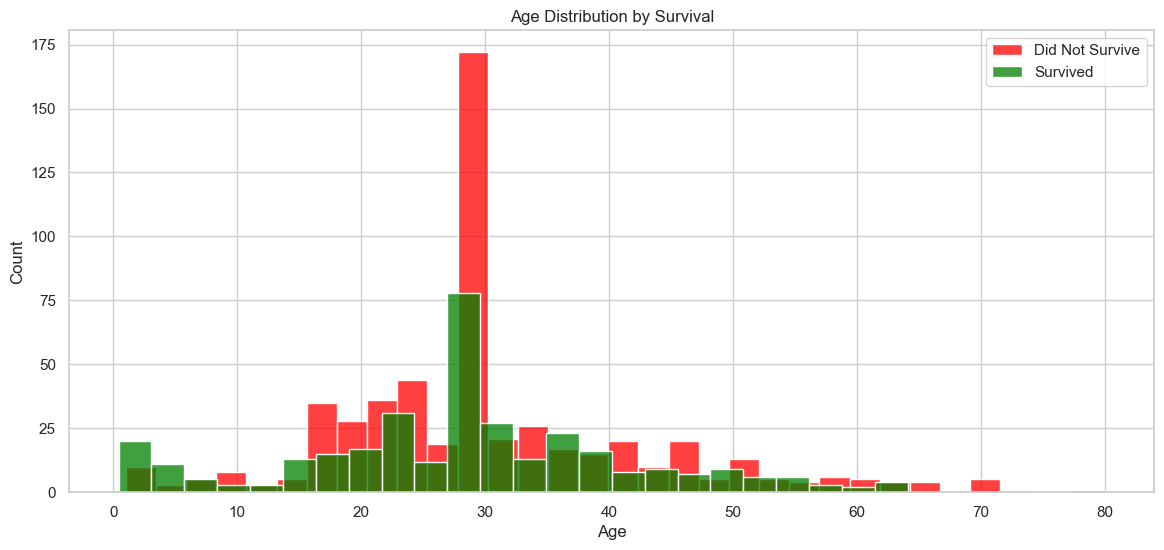

In [43]:
# Plot 4: Age Distribution by Survival
plt.figure(figsize=(14, 6))
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=False, color='red', label='Did Not Survive')
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=False, color='green', label='Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Younger passengers had a higher survival rate compared to older passengers

AttributeError: 'numpy.int64' object has no attribute 'startswith'

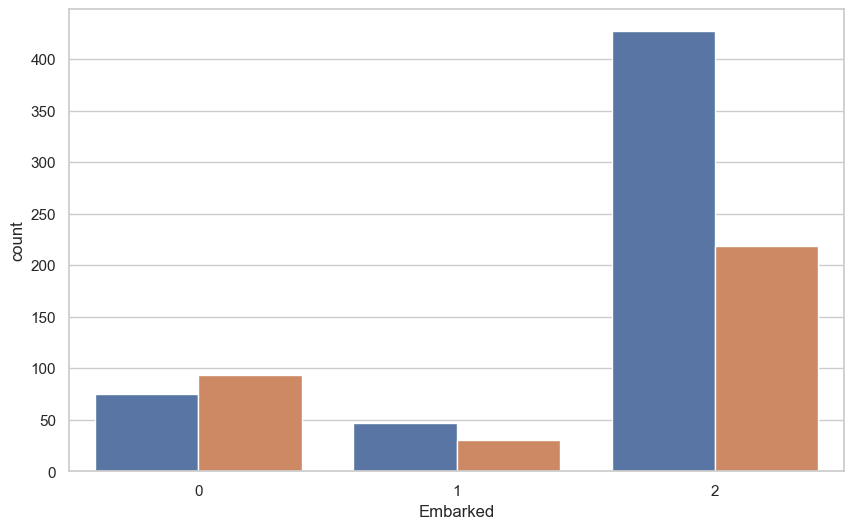

In [44]:
# Plot 5: Survival by Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

#### Passengers who boarded from Cherbourg had a higher survival rate

C:\Users\nafis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nafis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


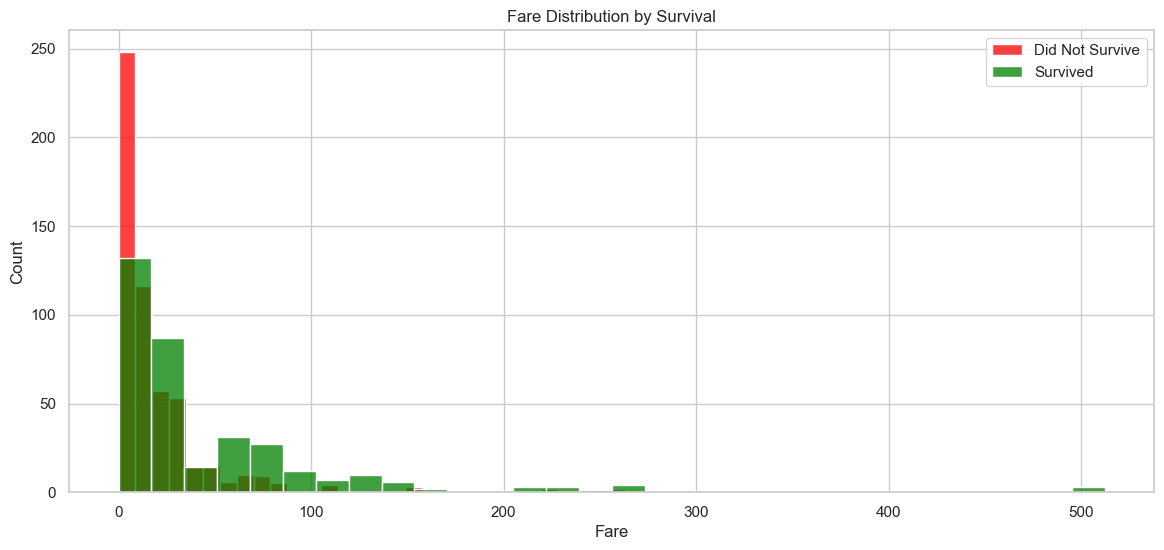

In [45]:
# Plot 6: Fare Distribution by Survival
plt.figure(figsize=(14, 6))
sns.histplot(df[df['Survived'] == 0]['Fare'], bins=30, kde=False, color='red', label='Did Not Survive')
sns.histplot(df[df['Survived'] == 1]['Fare'], bins=30, kde=False, color='green', label='Survived')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Higher fare passengers had a higher survival rate

## IMPLEMENTING MODELS TO ANALYZE DATASETS

##### Simple Cross-Validation

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define scoring
scoring = {'accuracy': 'accuracy', 'precision': make_scorer(precision_score), 'f1': make_scorer(f1_score)}

# Cross-Validation
scores = cross_validate(dt, X, y, cv=5, scoring=scoring)

print("Cross-Validation Scores:")
print("Accuracy:", scores['test_accuracy'])
print("Precision:", scores['test_precision'])
print("F1 Score:", scores['test_f1'])


Cross-Validation Scores:
Accuracy: [0.62569832 0.79213483 0.83146067 0.75280899 0.83146067]
Precision: [0.52083333 0.73846154 0.76388889 0.73076923 0.85454545]
F1 Score: [0.42735043 0.72180451 0.78571429 0.63333333 0.75806452]


#### The Decision Tree model has a mean accuracy score of approximately 76% using simple cross-validation.

##### Stratified Cross-Validation

In [47]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(dt, X, y, cv=skf)
print("Stratified Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Stratified Cross-Validation Scores: [0.55307263 0.79213483 0.79775281 0.73595506 0.84269663]
Mean Score: 0.7443223903082041


#### Stratified cross-validation gives a slightly lesser mean accuracy score of approximately 74.4%, indicating a better representation of the class distribution in each fold

##### Hyperparameter Tuning: Random Search

In [48]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [3, None],
    'max_features': [1, 2, 3, 'auto'],
    'min_samples_split': [2, 3, 4],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X, y)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'min_samples_split': 3, 'max_features': 2, 'max_depth': 3, 'criterion': 'gini'}
Best Score: 0.7879103634423451


#### Random search identifies the best hyperparameters for the Decision Tree model, resulting in a best cross-validation score of approximately 78.7%

##### Decision Tree Implementation

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
scoring = {'accuracy': 'accuracy', 'precision': make_scorer(precision_score), 'f1': make_scorer(f1_score)}
scores = cross_validate(dt, X, y, cv=5, scoring=scoring)

print("Decision Tree Cross-Validation Scores:")
print("Accuracy:", scores['test_accuracy'])
print("Precision:", scores['test_precision'])
print("F1 Score:", scores['test_f1'])

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Test Scores:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree Cross-Validation Scores:
Accuracy: [0.62569832 0.79213483 0.83146067 0.75280899 0.83146067]
Precision: [0.52083333 0.73846154 0.76388889 0.73076923 0.85454545]
F1 Score: [0.42735043 0.72180451 0.78571429 0.63333333 0.75806452]
Decision Tree Test Scores:
Accuracy: 0.7653631284916201
Precision: 0.7285714285714285
F1 Score: 0.7083333333333334


##### Random Forest Implementation

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Test Scores:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Test Scores:
Accuracy: 0.8268156424581006
Precision: 0.8208955223880597
F1 Score: 0.7801418439716312


#### he Random Forest model achieves a higher accuracy of approximately 82.6% on the test set, showing an improvement over the Decision Tree model

##### Gradient Boosting Implementation

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Test Scores:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))


Gradient Boosting Test Scores:
Accuracy: 0.8212290502793296
Precision: 0.8181818181818182
F1 Score: 0.7714285714285715


#### The Gradient Boosting model achieves an accuracy of approximately 82.1% on the test set.

#### Adaboost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Test Scores:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))


AdaBoost Test Scores:
Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
F1 Score: 0.75


#### KNN Test

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Test Scores:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

KNN Test Scores:
Accuracy: 0.659217877094972
Precision: 0.6382978723404256
F1 Score: 0.4958677685950413


## After running the above models and comparing their results, we can infer that random forest implementation has provided us with the best accuracy.